In [1]:
import numpy as np
from scipy.linalg import eig

# 定义系统参数
N = 2  # 或者 N = 3

# 以下是一个简单的哈密顿量示例（使用Pauli矩阵）
# 这个示例适用于自旋1/2的系统，可以根据你的系统更改哈密顿量
# 这里只是一个示例，你需要根据你的系统来定义合适的哈密顿量
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# 构建哈密顿量
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(N):
    # 例如，这里简单地将sigma_x加到哈密顿量中
    H += np.kron(np.kron(np.eye(2**i), sigma_x), np.eye(2**(N-i-1)))

# 对角化哈密顿量
eigenvalues, eigenvectors = eig(H)

# 输出结果
print("Eigenvalues (Energy levels):")
print(eigenvalues)
print("\nEigenvectors (Wavefunctions):")
print(eigenvectors)


Eigenvalues (Energy levels):
[ 2.00000000e+00+0.j -6.42809725e-17+0.j -2.00000000e+00+0.j
  0.00000000e+00+0.j]

Eigenvectors (Wavefunctions):
[[ 5.00000000e-01-0.j  7.07106781e-01+0.j  5.00000000e-01-0.j
  -0.00000000e+00-0.j]
 [ 5.00000000e-01-0.j -7.63278329e-17-0.j -5.00000000e-01-0.j
   7.07106781e-01+0.j]
 [ 5.00000000e-01-0.j -1.38777878e-17-0.j -5.00000000e-01-0.j
  -7.07106781e-01-0.j]
 [ 5.00000000e-01+0.j -7.07106781e-01-0.j  5.00000000e-01+0.j
  -0.00000000e+00-0.j]]


In [2]:
import numpy as np
from scipy.linalg import eig

# 定义系统参数
N = 2  # 或者 N = 3
# 定义T和V的形式，这里是示例形式，你需要根据你的系统来修改它们
T = np.identity(N)  # 例如，这里假设T是单位矩阵
V = np.zeros((N, N))  # 例如，这里假设V是零矩阵

# 构建哈密顿量矩阵
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H_ij = 0
        for n in range(N):
            for n_prime in range(N):
                H_ij += (T[n_prime, n] + V[n_prime, n]) * (i & (1 << n)) * (j & (1 << n_prime))
        H[i, j] = H_ij

# 对角化哈密顿量
eigenvalues, eigenvectors = eig(H)

# 输出结果
print("Eigenvalues (Energy levels):")
print(eigenvalues)
print("\nEigenvectors (Wavefunctions):")
print(eigenvectors)


Eigenvalues (Energy levels):
[8.60555128e+00+0.j 2.37169797e-16+0.j 1.39444872e+00+0.j
 0.00000000e+00+0.j]

Eigenvectors (Wavefunctions):
[[-0.        -0.j -0.        -0.j -0.        -0.j  1.        +0.j]
 [ 0.0987837 -0.j  0.57735027+0.j  0.81049889+0.j  0.        +0.j]
 [ 0.65252078-0.j  0.57735027-0.j -0.49079864-0.j  0.        +0.j]
 [ 0.75130448+0.j -0.57735027-0.j  0.31970025-0.j  0.        +0.j]]


In [23]:
import numpy as np
from scipy.linalg import eig

# 定义系统参数
N = 2  # 或者 N = 3
hbar = 1.0  # 哈密顿量中的常数因子
omega = 1.0  # 假设的频率
V0 = 5.68658111  # 势能的强度

# 构建哈密顿量矩阵
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H_ij = 0
        for n in range(N):
            n_prime = n
            delta_n = 0
            if i == j:
                delta_n = 1
            if n_prime == n:
                term1 = (2 * n + 1.5) * delta_n
                term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
                term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
                H_ij += (hbar * omega / 2) * (term1 - term2 - term3)
            H_ij += V0 * delta_n  # 添加势能项
        H[i, j] = H_ij

# 对角化哈密顿量
eigenvalues, eigenvectors = eig(H)

# 输出结果
print("Eigenvalues (Energy levels):")
print(eigenvalues)
print("\nEigenvectors (Wavefunctions):")
print(eigenvectors)


Eigenvalues (Energy levels):
[15.27610407+0.j  9.66433667+0.j 15.27610407+0.j 15.27610407+0.j]

Eigenvectors (Wavefunctions):
[[ 0.8660254 +0.j  0.5       -0.j  0.18918883+0.j  0.24508698+0.j]
 [-0.28867513-0.j  0.5       -0.j  0.71823971+0.j -0.56248338+0.j]
 [-0.28867513-0.j  0.5       +0.j -0.58903986+0.j -0.37664029+0.j]
 [-0.28867513-0.j  0.5       -0.j -0.31838868+0.j  0.69403669+0.j]]


In [4]:
import numpy as np
from scipy.linalg import eig

# 定义系统参数
N = 3  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H_ij = 0
        for n in range(N):
            n_prime = n
            delta_n = 0
            if i == j:
                delta_n = 1
            if n_prime == n:
                term1 = (2 * n + 1.5) * delta_n
                term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
                term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
                H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
            H_ij += V0 * delta_n  # 添加势能项
        H[i, j] = H_ij

# 对角化哈密顿量
eigenvalues, eigenvectors = eig(H)

# 输出结果
print("Eigenvalues (Energy levels in MeV):")
print(eigenvalues)
print("\nEigenvectors (Wavefunctions):")
print(eigenvectors)


Eigenvalues (Energy levels in MeV):
[  46.59721714+0.j -168.65846659+0.j   46.59721714+0.j   46.59721714+0.j
   46.59721714+0.j   46.59721714+0.j   46.59721714+0.j   46.59721714+0.j]

Eigenvectors (Wavefunctions):
[[ 0.93541435+0.j  0.35355339-0.j -0.25567387+0.j  0.05877089-0.j
  -0.01743415+0.j -0.04706366+0.j -0.02278016+0.j  0.04561804+0.j]
 [-0.13363062-0.j  0.35355339+0.j  0.92709083+0.j  0.2979753 -0.j
  -0.03754684+0.j -0.05047277+0.j  0.11351308+0.j  0.01422992+0.j]
 [-0.13363062-0.j  0.35355339-0.j -0.11190283+0.j  0.63519802+0.j
  -0.03676142+0.j -0.05950983+0.j  0.06071015+0.j -0.15094042+0.j]
 [-0.13363062-0.j  0.35355339-0.j -0.11190283+0.j  0.24325698-0.j
   0.90422362+0.j  0.06599494+0.j  0.03624033+0.j -0.14708962+0.j]
 [-0.13363062-0.j  0.35355339-0.j -0.11190283+0.j -0.52733357-0.j
  -0.09961992+0.j  0.84279292+0.j -0.28404633+0.j -0.11841366+0.j]
 [-0.13363062-0.j  0.35355339-0.j -0.11190283+0.j -0.23595587-0.j
  -0.23762043+0.j -0.49371155+0.j -0.49860377+0.j -0.41

In [6]:
import numpy as np

def calculate_H_ij(N, hbar_omega, V0, i, j):
    H_ij = 0
    for n in range(N):
        for n_prime in range(N):
            delta_n = 0
            if i == j:
                delta_n = 1
            if n_prime == n:
                term1 = (2 * n + 1.5) * delta_n
                term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
                term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
                H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
            H_ij += V0 * delta_n  # 添加势能项
    return H_ij

# 定义系统参数
N = 3  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 输出哈密顿量矩阵
print("Hamiltonian Matrix:")
print(H)


Hamiltonian Matrix:
[[-14.42922999+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j
  -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j]
 [-26.90696047+0.j -14.42922999+0.j -26.90696047+0.j -26.90696047+0.j
  -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j]
 [-26.90696047+0.j -26.90696047+0.j -14.42922999+0.j -26.90696047+0.j
  -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j]
 [-26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -14.42922999+0.j
  -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j]
 [-26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j
  -14.42922999+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j]
 [-26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j
  -26.90696047+0.j -14.42922999+0.j -26.90696047+0.j -26.90696047+0.j]
 [-26.90696047+0.j -26.90696047+0.j -26.90696047+0.j -26.90696047+0.j
  -26.90696047+0.j -26.90696047+0.j -14.42922999+0.j -26.9069604

In [19]:
import numpy as np
from scipy.linalg import eig

# 定义系统参数
N = 2  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
def calculate_H_ij(N, hbar_omega, V0, i, j):
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H_ij = 0
        for n in range(N):
            n_prime = n
            delta_n = 0
            if i == j:
                delta_n = 1
            if n_prime == n:
                term1 = (2 * n + 1.5) * delta_n
                term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
                term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
                H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
            H_ij += V0 * delta_n  # 添加势能项
        H[i, j] = H_ij
    return H_ij

# 定义系统参数
N = 3  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 输出哈密顿量矩阵
print("Hamiltonian Matrix:")
print(H)

H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 对角化哈密顿量
eigenvalues, eigenvectors = eig(H)

# 输出结果
print("Eigenvalues (Energy levels in MeV):")
print(eigenvalues)
print("\nEigenvectors (Wavefunctions):")
print(eigenvectors)


IndentationError: expected an indented block (405756005.py, line 11)

In [20]:
import numpy as np
from scipy.linalg import eigvals

# 定义系统参数
N = 2  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
def calculate_H_ij(N, hbar_omega, V0, i, j):
    H_ij = 0
    for n in range(N):
        for n_prime in range(N):
            delta_n = 0
            if i == j:
                delta_n = 1
            if n_prime == n:
                term1 = (2 * n + 1.5) * delta_n
                term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
                term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
                H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
            H_ij += V0 * delta_n  # 添加势能项
    return H_ij

H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 计算哈密顿量的本征值
eigenvalues = eigvals(H)

# 输出结果
print("Eigenvalues (Energy levels in MeV):")
print(eigenvalues)


SyntaxError: 'return' outside function (527388001.py, line 27)

In [21]:
import numpy as np
from scipy.linalg import eigvals

# 定义系统参数
N = 2  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
def calculate_H_ij(N, hbar_omega, V0, i, j):
    H_ij = 0
    for n in range(N):
        for n_prime in range(N):
            delta_n = 0
            if i == j:
                delta_n = 1
            if n_prime == n:
                term1 = (2 * n + 1.5) * delta_n
                term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
                term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
                H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
            H_ij += V0 * delta_n  # 添加势能项
    return H_ij

H = np.zeros((2**N, 2**N), dtype=complex)
for i in range(2**N):
    for j in range(2**N):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 计算哈密顿量的本征值
eigenvalues = eigvals(H)

# 输出结果
print("Eigenvalues (Energy levels in MeV):")
for eigenvalue in eigenvalues:
    print(eigenvalue)


Eigenvalues (Energy levels in MeV):
(4.574268515165225+0j)
(-34.708103305495676+0j)
(4.574268515165223+0j)
(4.574268515165225+0j)


In [24]:
import numpy as np
from scipy.linalg import eig

# 定义系统参数
N = 2  # 或者 N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
def calculate_H_ij(N, hbar_omega, V0, i, j):
    H_ij = 0
    for n in range(N):
        n_prime = n
        delta_n = 0
        if i == j:
            delta_n = 1
        if n_prime == n:
            term1 = (2 * n + 1.5) * delta_n
            term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
            term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
            H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
        H_ij += V0 * delta_n  # 添加势能项
    return H_ij

# 构建哈密顿量矩阵
dimension = 2**N
H = np.zeros((dimension, dimension), dtype=complex)
for i in range(dimension):
    for j in range(dimension):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 对角化哈密顿量
eigenvalues, eigenvectors = eig(H)

# 输出结果
print("Eigenvalues (Energy levels in MeV):")
print(eigenvalues)
print("\nEigenvectors (Wavefunctions):")
print(eigenvectors)


Eigenvalues (Energy levels in MeV):
[ 15.94743074+0.j -23.33494109+0.j  15.94743074+0.j  15.94743074+0.j]

Eigenvectors (Wavefunctions):
[[ 0.8660254 +0.j  0.5       +0.j  0.14779939+0.j -0.2209904 -0.j]
 [-0.28867513-0.j  0.5       -0.j -0.61814659+0.j  0.79272013+0.j]
 [-0.28867513-0.j  0.5       -0.j  0.72783824+0.j -0.00362329-0.j]
 [-0.28867513-0.j  0.5       -0.j -0.25749104+0.j -0.56810643-0.j]]


In [27]:
import numpy as np
from scipy.linalg import eigvals

# 定义系统参数（氘核的参数）
N = 3
hbar_omega = 7.0  # MeV
V0 = -5.68658111  # MeV

# 构建哈密顿量矩阵
def calculate_H_ij(N, hbar_omega, V0, i, j):
    H_ij = 0
    for n in range(N):
        n_prime = n
        delta_n = 0
        if i == j:
            delta_n = 1
        if n_prime == n:
            term1 = (2 * n + 1.5) * delta_n
            term2 = np.sqrt(n * (n + 0.5)) * (1 - delta_n)
            term3 = np.sqrt(n * (n + 1.5)) * (1 - delta_n)
            H_ij += (hbar_omega / 2) * (term1 - term2 - term3)
        H_ij += V0 * delta_n  # 添加势能项
    return H_ij

# 构建哈密顿量矩阵
dimension = 2**N
H = np.zeros((dimension, dimension), dtype=complex)
for i in range(dimension):
    for j in range(dimension):
        H[i, j] = calculate_H_ij(N, hbar_omega, V0, i, j)

# 计算哈密顿量的本征值
eigenvalues = eigvals(H)

# 输出结果
print("Eigenvalues (Energy levels in MeV) for Deuteron:")
print(eigenvalues)


Eigenvalues (Energy levels in MeV) for Deuteron:
[  46.59721714+0.j -168.65846659+0.j   46.59721714+0.j   46.59721714+0.j
   46.59721714+0.j   46.59721714+0.j   46.59721714+0.j   46.59721714+0.j]


In [8]:
import numpy as np

# 定义哈密顿矩阵元素的函数
def hamiltonian_element(n, n_prime):
    # 在这里使用你提供的哈密顿矩阵元素表达式
    # 根据你的具体表达式计算 H[n, n_prime] 的值
    # 这里仅提供一个示例
    h = (2 * n + 3/2) * (n == n_prime) - np.sqrt(n * (n + 1/2)) * (n + 1 == n_prime) - np.sqrt(n * (n + 3/2)) * (n - 1 == n_prime)
    return h

# 系统参数
N = 2  # 设置系统的维度
hbar_omega = 7.0  # ~ω = 7 MeV
V0 = -5.68658111  # V0 = −5.68658111 MeV

# 构建哈密顿矩阵
H = np.zeros((N, N))
for n in range(N):
    for n_prime in range(N):
        H[n, n_prime] = (hbar_omega / 2) * hamiltonian_element(n, n_prime) + V0 * (n == 0 and n_prime == 0)

# 对角化哈密顿矩阵
eigenvalues, eigenvectors = np.linalg.eig(H)

# 对本征值从小到大排序
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 打印本征值和本征态
print("Eigenvalues:")
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Eigenvalue {i + 1}: {eigenvalue}")

print("\nEigenvectors (columns represent eigenvectors):")
print(sorted_eigenvectors)


Eigenvalues:
Eigenvalue 1: -0.43658110999999966
Eigenvalue 2: 12.25

Eigenvectors (columns represent eigenvectors):
[[0.91659172 0.        ]
 [0.39982448 1.        ]]


In [26]:
import numpy as np
from scipy.linalg import eigh

# 定义哈密顿矩阵元素的函数
def hamiltonian_element(n, n_prime):
    # 在这里使用你提供的哈密顿矩阵元素表达式
    # 根据你的具体表达式计算 H[n, n_prime] 的值
    # 这里仅提供一个示例
    h = (2 * n + 3/2) * (n == n_prime) - np.sqrt(n * (n + 1/2)) * (n + 1 == n_prime) - np.sqrt((n +1)* (n + 3/2)) * (n - 1 == n_prime)
    return h

# 系统参数
N = 2  # 设置系统的维度
hbar_omega = 7.0  # ~ω = 7 MeV
V0 = -5.68658111  # V0 = −5.68658111 MeV

# 构建哈密顿矩阵
H = np.zeros((N, N))
for n in range(N):
    for n_prime in range(N):
        H[n, n_prime] = (hbar_omega / 2) * hamiltonian_element(n, n_prime) + V0 * (n == 0 and n_prime == 0)

# 对角化哈密顿矩阵
eigenvalues, eigenvectors = eigh(H)

# 对本征值从小到大排序
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 打印本征值和本征态
print("Eigenvalues:")
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Eigenvalue {i + 1}: {eigenvalue}")

print("\nEigenvectors (columns represent eigenvectors):")
print(sorted_eigenvectors)


Eigenvalues:
Eigenvalue 1: -4.167382825033673
Eigenvalue 2: 15.980801715033673

Eigenvectors (columns represent eigenvectors):
[[-0.90268038 -0.43031167]
 [-0.43031167  0.90268038]]


In [20]:
import numpy as np
from scipy.linalg import eigh
from mpmath import mp

# 设置更高的精度，例如，使用100位精度
mp.dps = 100

# 定义哈密顿矩阵元素的函数
def hamiltonian_element(n, n_prime):
    # 使用mpmath的高精度浮点数进行计算
    n = mp.mpf(n)
    n_prime = mp.mpf(n_prime)
    
    # 在这里使用你提供的哈密顿矩阵元素表达式
    # 根据你的具体表达式计算 H[n, n_prime] 的值
    # 这里仅提供一个示例
    h = (2 * n + 3/2) * (n == n_prime) - mp.sqrt(n * (n + 1/2)) * (n + 1 == n_prime) - mp.sqrt((n+1) * (n + 3/2)) * (n - 1 == n_prime)
    return h

# 系统参数
N = 2  # 设置系统的维度
hbar_omega = mp.mpf('7.0')  # ~ω = 7 MeV
V0 = mp.mpf('-5.68658111')  # V0 = −5.68658111 MeV

# 构建哈密顿矩阵
H = np.zeros((N, N))
for n in range(N):
    for n_prime in range(N):
        H[n, n_prime] = (hbar_omega / 2) * hamiltonian_element(n, n_prime) + V0 * (n == 0 and n_prime == 0)

# 对角化哈密顿矩阵
eigenvalues, eigenvectors = eigh(H)

# 对本征值从小到大排序
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 打印本征值和本征态
print("Eigenvalues:")
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Eigenvalue {i + 1}: {eigenvalue}")

print("\nEigenvectors (columns represent eigenvectors):")
print(sorted_eigenvectors)


Eigenvalues:
Eigenvalue 1: -4.167382825033673
Eigenvalue 2: 15.980801715033675

Eigenvectors (columns represent eigenvectors):
[[-0.90268038 -0.43031167]
 [-0.43031167  0.90268038]]


In [23]:
import numpy as np

# 定义系统的参数
N = 3  # 假设系统的维度是 10
V0 = -5.68658111  # MeV
hbar_omega = 7  # MeV
Lambda = 152  # MeV

# 创建哈密顿矩阵 H_N
H_N = np.zeros((N, N), dtype=float)

for n in range(N):
    for n_prime in range(N):
        H_N[n_prime, n] = (hbar_omega / 2) * ((2 * n + 1.5) * (n_prime == n) - np.sqrt(n * (n + 0.5)) * (n_prime == n + 1) - np.sqrt((n + 1) * (n + 1.5)) * (n_prime == n - 1)) + V0 * (n == 0) * (n_prime == n)

# 计算哈密顿矩阵的本征值和本征矢量
eigenvalues, eigenvectors = np.linalg.eigh(H_N)

# 对本征值进行排序
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 输出本征值
print("Sorted Eigenvalues (Energy Levels):")
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Energy Level {i + 1}: {eigenvalue} MeV")

# 输出本征矢量（量子态）
print("\nCorresponding Quantum States (Eigenvectors):")
for i, eigenvector in enumerate(sorted_eigenvectors.T):
    print(f"Energy Level {i + 1} Eigenstate:")
    print(eigenvector)


Sorted Eigenvalues (Energy Levels):
Energy Level 1: -0.43658110999999966 MeV
Energy Level 2: 10.216014094705335 MeV
Energy Level 3: 21.283985905294664 MeV

Corresponding Quantum States (Eigenvectors):
Energy Level 1 Eigenstate:
[1. 0. 0.]
Energy Level 2 Eigenstate:
[-0.         -0.90345325 -0.42868664]
Energy Level 3 Eigenstate:
[ 0.         -0.42868664  0.90345325]


对角化程序

In [166]:
import numpy as np
from scipy.linalg import eigh

# 定义常数
hbar_times_omega = 7.0  # hbar * omega = 7 MeV
V0 = -5.68658111  # 势能常数 V0 = -5.68658111 MeV
Lambda = 152.0  # 超紫外截断 Λ ≈ 152 MeV
N = 6  # 假设基础维度为100（可以根据需要更改）

# 构建哈密顿量矩阵
H = np.zeros((N, N), dtype=complex)

for n in range(N):
    for n_prime in range(N):
        T_element = (hbar_times_omega / 2) * (
            (2 * n + 3/2) * (n_prime == n) -
            np.sqrt(n * (n + 1/2)) * (n_prime + 1 == n ) -
            np.sqrt((n + 1) * (n + 3/2)) * (n_prime-1 == n )
        )
        V_element = V0 * (n == 0) * (n_prime == n)
        H[n, n_prime] = T_element + V_element

# 对角化哈密顿量矩阵
eigenvalues, eigenvectors = eigh(H)

# 输出结果
print("Eigenvalues (in MeV):")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues (in MeV):
[-2.20156815  3.65379671 11.44995826 22.14853571 36.8893105  58.87338586]

Eigenvectors:
[[ 0.90040679+0.j -0.34539007-0.j  0.24506954+0.j  0.09780648+0.j
  -0.01861815-0.j  0.0012228 +0.j]
 [ 0.37073758-0.j  0.32957905-0.j -0.67956514-0.j -0.51531914-0.j
   0.16211865+0.j -0.01691885-0.j]
 [ 0.19141371-0.j  0.55118181-0.j -0.20369906-0.j  0.59819891+0.j
  -0.50019986-0.j  0.10012121+0.j]
 [ 0.10621748-0.j  0.5305372 -0.j  0.3288493 -0.j  0.20272015-0.j
   0.66609683+0.j -0.33812101-0.j]
 [ 0.05732105-0.j  0.38635037+0.j  0.48333743-0.j -0.40088925-0.j
  -0.09521673-0.j  0.66637392+0.j]
 [ 0.02478305-0.j  0.19376694-0.j  0.30802907+0.j -0.40648553-0.j
  -0.52001904-0.j -0.65674042-0.j]]


[-0.43658111 -1.74915988 -2.0456709  -2.14398103 -2.18359171 -2.20156815
 -2.21041583 -2.21503787 -2.21756649 -2.21900223]


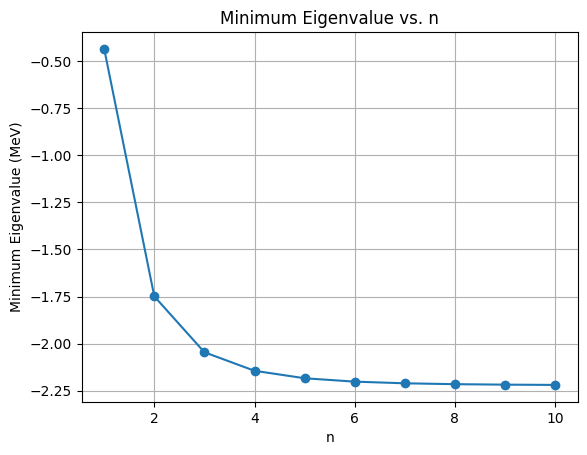

In [173]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# 定义常数
hbar_times_omega = 7.0  # hbar * omega = 7 MeV
V0 = -5.68658111  # 势能常数 V0 = -5.68658111 MeV
Lambda = 152.0  # 超紫外截断 Λ ≈ 152 MeV
N_max = 10  # 最大基础维度（可以根据需要更改）
n_values = np.arange(1, N_max + 1)

# 存储最小 eigenvalue
min_eigenvalues = []

for N in n_values:
    # 构建哈密顿量矩阵
    H = np.zeros((N, N), dtype=complex)

    for n in range(N):
        for n_prime in range(N):
            T_element = (hbar_times_omega / 2) * (
                (2 * n + 3/2) * (n_prime == n) -
                np.sqrt(n * (n + 1/2)) * (n_prime + 1 == n ) -
                np.sqrt((n + 1) * (n + 3/2)) * (n_prime-1 == n )
            )
            V_element = V0 * (n == 0) * (n_prime == n)
            H[n, n_prime] = T_element + V_element

    # 对角化哈密顿量矩阵
    eigenvalues, eigenvectors = eigh(H)
    
    # 获取最小 eigenvalue 并添加到列表
    min_eigenvalues.append(min(eigenvalues))
    

# 转换为 NumPy 数组
min_eigenvalues = np.array(min_eigenvalues)
print(min_eigenvalues)

# 绘制最小 eigenvalue 与 n 的关系图像
plt.plot(n_values, min_eigenvalues, marker='o')
plt.xlabel('n')
plt.ylabel('Minimum Eigenvalue (MeV)')
plt.title('Minimum Eigenvalue vs. n')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# 定义常数
hbar_times_omega = 7.0  # hbar * omega = 7 MeV
V0 = -5.68658111  # 势能常数 V0 = -5.68658111 MeV
Lambda = 152.0  # 超紫外截断 Λ ≈ 152 MeV
N_max = 2  # 最大基础维度（可以根据需要更改）
n_values = np.arange(1, N_max + 1)

# 存储最小 eigenvalue
min_eigenvalues = []

for N in n_values:
    # 构建哈密顿量矩阵
    H = np.zeros((N, N), dtype=complex)

    for n in range(N):
        for n_prime in range(N):
            T_element = (hbar_times_omega / 2) * (
                (2 * n + 3/2) * (n_prime == n) -
                np.sqrt(n * (n + 1/2)) * (n_prime + 1 == n ) -
                np.sqrt((n + 1) * (n + 3/2)) * (n_prime-1 == n )
            )
            V_element = V0 * (n == 0) * (n_prime == n)
            H[n, n_prime] = T_element + V_element
            print(H[n, n_prime])



(-0.43658110999999966+0j)
(-0.43658110999999966+0j)
(-4.286607049870561+0j)
(-4.286607049870561+0j)
(12.25+0j)


外推公式的证明

要复现外推公式对其进行的实验

In [14]:
hbar=6.5821220*10**-22
L=9.14
k = 100.0
gamma = 0.006
omega = 1.0
E_N=-(hbar*k)**2/2*m*(1-2*gamma**2/k*np.exp(-2*k*L)-4*gamma**4*L/k*np.exp(-4*k*L))+((hbar*gamma)**2*k)/m*(1-gamma**2/k-gamma**4/(4*k**2)+2*omega2*k*gamma**4)*np.exp(-4*k*L)
print(E_N)



-1.123891952932604e-53


In [90]:
import numpy as np
import matplotlib.pyplot as plt

# 定义常数和参数
hbar = 6.5821220 * 10**-22
omega = 7 / hbar
m = 55176584.58114082 / omega
k = -54155407727747**14
gamma = 8057451.122372734


# 创建一个空的能量值数组，用于存储计算得到的能量值
E_N_values = []

# 计算不同 N 值下的能量值
for N in N_values:
    if N > 0:  # 仅在 N 为正整数时计算
        L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    
        # 计算能量值
        E_N = -(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2) ) * np.exp(-4 * k * L    )
        E_N_values.append(E_N)
        print(E_N)

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(N_values[N_values > 0], E_N_values, marker='o')
plt.xlabel('N')
plt.ylabel('Energy (E_N)')
plt.title('Energy Function E_N vs. N')
plt.grid(True)
plt.show()




OverflowError: (34, 'Result too large')

In [170]:
hbar=6.5821220*10**-22
omega=7/hbar
m=55176584.58114082/omega
k = -54155407727747**14
gamma = 8057451.122372734
N=2
L = np.sqrt((4 * N + 7) * hbar / (m * omega))
print(np.exp(-4*L))

E_N=-(hbar*k)**2/2*m*(1-2*gamma**2/k*np.exp(-2*k*L)-4*gamma**4*L/k*np.exp(-4*k*L))+((hbar*gamma)**2*k)/m*(1-gamma**2/k-gamma**4/(4*k**2))*np.exp(-4*k*L)
print(E_N)

0.9999999999999465


OverflowError: (34, 'Result too large')

寻找正确的单位制和常量输出相近的L(N)

$2023.9.27$
一般情况下使用natural units

In [43]:
import numpy as np

hbar = 1  # 普朗克常数
omega = 7*(10**6)  # 角频率
print(omega)

# 存储不同 N 对应的 L 值（已转换为国际单位制）
L = np.array([9.14e-15, 11.45e-15, 13.38e-15])
for i in range(3):
    print(L[i])
    L[i]=L[i]/(1.97*10**-7)
    print(L[i])
aver=0
# 计算并使用 momega 值
for N in range(3):
    m = (4 * N + 7) * hbar / L[N]**2/omega
    print(f"N = {N+1}, m = {m} MeV")
    aver+=m
print(aver/3)
    


7000000
9.14e-15
4.639593908629442e-08
1.145e-14
5.812182741116752e-08
1.338e-14
6.791878172588834e-08
N = 1, m = 464558125.7272 MeV
N = 2, m = 465174740.5928294 MeV
N = 3, m = 464529655.49468577 MeV
464754173.9382384


In [55]:
hbar=1
omega=7/hbar
m=1879.45
for N in range(0,11):
    L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    e=-(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2)+2*omega2*k*gamma**4 ) * np.exp(-4 * k * L)
    
    print(L)


0.02306665455923916
0.02891558175622854
0.03376612480056017
0.03800251965058202
0.04181186213909565
0.04530201023447644
0.0485418628302466
0.05157860760796422
0.05444624026066641
0.05717021422268837
0.05977017408385179


In [56]:
hbar = 6.5821220 * 10**-22
omega = 7 / hbar
m = 55176584.58114082 / omega
for N in range(0,11):
    L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    e=-(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2)+2*omega2*k*gamma**4 ) * np.exp(-4 * k * L)
    
    print(L/(1.97*10**-7))


4.638615240679897e-08
5.814811934825777e-08
6.790237427639535e-08
7.642160087962122e-08
8.40820416595397e-08
9.110059482939186e-08
9.761581340593063e-08
1.0372258999626798e-07
1.0948928862754729e-07
1.1496709517422282e-07
1.201955141485374e-07


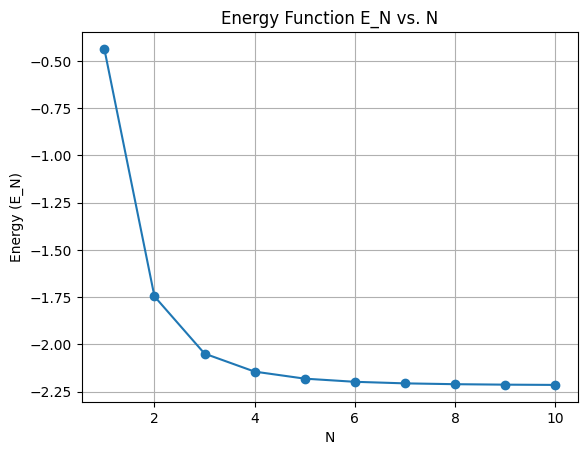

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# 定义常数和参数
hbar = 6.5821220 * 10**-22
omega = 7 / hbar
m = 55176584.58114082 / omega
k = 2.3045e+14
gamma = 80600891.0
omega2 = 2.2095e-44

# 初始化空列表来存储计算的能量值
E_N_values = []

# 循环计算能量值，从N=1开始
for N in range(1, 11):
    L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    e = -(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2) + 2 * omega2 * k * gamma**4) * np.exp(-4 * k * L)
    E_N_values.append(e)

# 将结果转换为NumPy数组
E_N_values = np.array(E_N_values)

# 绘制E_N关于N的图像
N_values = np.arange(1, 11)
plt.plot(N_values, E_N_values, marker='o')
plt.xlabel('N')
plt.ylabel('Energy (E_N)')
plt.title('Energy Function E_N vs. N')
plt.grid(True)
plt.show()


拟合曲线寻找k,$\omega$,和$\gamma$的取值

In [62]:
import numpy as np

hbar = 6.5821220 * 10**-22
omega = 7 / hbar
m = 55176584.58114082 / omega
k = -26743129849360.53
gamma = 13834391.498240285

def model_function(N):
    L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    
    E_N = -(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2)) * np.exp(-4 * k * L)
    return E_N

# 获取N=1和N=2时的E_N值
E_N_N1 = model_function(N=1)
E_N_N2 = model_function(N=2)

print("E_N when N=1:", E_N_N1)
print("E_N when N=2:", E_N_N2)


E_N when N=1: -0.43599999999999905
E_N when N=2: -1.749000000000004


[[Model]]
    Model(model_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 6
    # variables        = 3
    chi-square         = 3.5699e-05
    reduced chi-square = 1.1900e-05
    Akaike info crit   = -66.1928117
    Bayesian info crit = -66.8175333
    R-squared          = 0.99998480
[[Variables]]
    k:       2.3045e+14 +/- 1.2870e+11 (0.06%) (init = 2.3045e+14)
    gamma:   80600891.0 +/- 1105023.11 (1.37%) (init = 8.060089e+07)
    omega2:  2.2095e-44 +/- 1.4948e-45 (6.77%) (init = 2.2095e-44)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma, omega2) = -0.9978
    C(k, gamma)      = +0.8208
    C(k, omega2)     = -0.7873


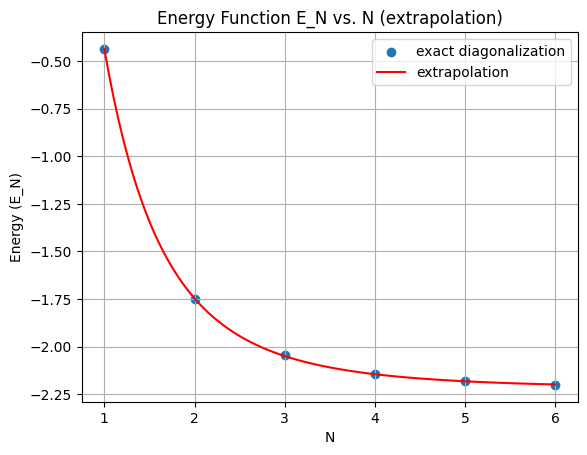

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# 定义常数和参数
hbar = 1
omega = 7 / hbar
m = 8.38279578852243e+28/omega
k = -26743129849360.53
gamma = 13834391.498240285
N_values = np.array([ 1,2,3,4,5,6])  # 数据点对应的 N 值
E_N_values = np.array([-0.436, -1.749, -2.045, -2.143, -2.183,-2.201])  # 数据点对应的能量值

# 定义模型函数，这里的函数形式应该与您的能量函数匹配
def model_function(N, k, gamma, omega2):
    L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    
    # 计算模型的能量值
    E_N =-(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2) + 2 * omega2 * k * gamma**4) * np.exp(-4 * k * L)
    return E_N

# 创建模型对象
model = Model(model_function)

# 设置参数的初始值
params = model.make_params(k=2.3045e+14, gamma=80600891.0, omega2=2.2095e-44)

# 进行拟合
result = model.fit(E_N_values, N=N_values, params=params)

# 打印拟合结果
print(result.fit_report())

# 绘制拟合结果与实际数据点的比较
N_fit = np.linspace(1, 6, 100)  # 仅包含两个 N 值
E_N_fit = result.eval(N=N_fit)

plt.scatter(N_values, E_N_values, label='exact diagonalization')
plt.plot(N_fit, E_N_fit, 'r', label='extrapolation')
plt.legend()
plt.xlabel('N')
plt.ylabel('Energy (E_N)')
plt.title('Energy Function E_N vs. N (extrapolation)')
plt.grid(True)
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# 定义常数和参数
hbar = 1
omega = 7 / hbar
m = 1879.45
k = -26743129849360.53
gamma = 13834391.498240285
N_values = np.array([ 1,2,3,4,5,6])  # 数据点对应的 N 值
E_N_values = np.array([-0.436, -1.749, -2.045, -2.143, -2.183,-2.201])  # 数据点对应的能量值

# 定义模型函数，这里的函数形式应该与您的能量函数匹配
def model_function(N, k, gamma, omega2):
    if N>3:
        L = np.sqrt((4 * N + 7) * hbar / (m * omega))
        E_N =-(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2) + 2 * omega2 * k * gamma**4) * np.exp(-4 * k * L)
    else: 
        L=np.array([4.639593908629442e-08,5.812182741116752e-08,6.791878172588834e-08])
        E_N =-(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2) + 2 * omega2 * k * gamma**4) * np.exp(-4 * k * L)

    
    # 计算模型的能量值
    
    return E_N

# 创建模型对象
model = Model(model_function)

# 设置参数的初始值
params = model.make_params(k=2.3045e+14, gamma=80600891.0, omega2=2.2095e-44)

# 进行拟合
result = model.fit(E_N_values, N=N_values, params=params)

# 打印拟合结果
print(result.fit_report())

# 绘制拟合结果与实际数据点的比较
N_fit = np.linspace(1, 6, 100)  # 仅包含两个 N 值
E_N_fit = result.eval(N=N_fit)

plt.scatter(N_values, E_N_values, label='exact diagonalization')
plt.plot(N_fit, E_N_fit, 'r', label='extrapolation')
plt.legend()
plt.xlabel('N')
plt.ylabel('Energy (E_N)')
plt.title('Energy Function E_N vs. N (extrapolation)')
plt.grid(True)
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Text(0.5, 1.0, 'Energy Function E_N vs. N')

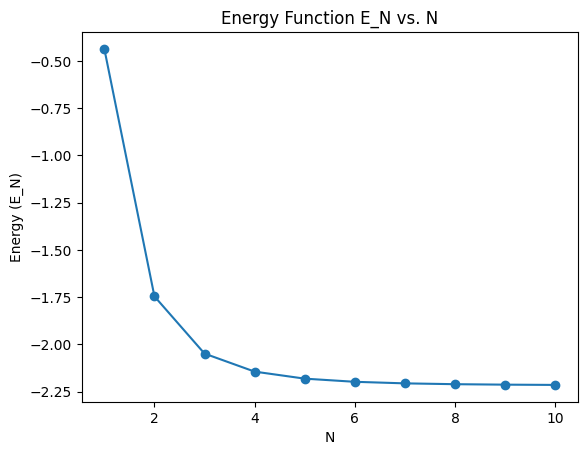

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# 定义常数和参数
hbar = 6.5821220 * 10**-22
omega = 7 / hbar
m = 55176584.58114082 / omega
k = 2.3045e+14
gamma = 80600891.0
omega2 = 2.2095e-44

# 初始化空列表来存储计算的能量值
E_N_values = []

# 循环计算能量值，从N=1开始
for N in range(1, 11):
    L = np.sqrt((4 * N + 7) * hbar / (m * omega))
    e = -(hbar * k)**2 / (2 * m) * (1 - 2 * gamma**2 / k * np.exp(-2 * k * L) - 4 * gamma**4 * L / k * np.exp(-4 * k * L)) + ((hbar * gamma)**2 * k) / m * (1 - gamma**2 / k - gamma**4 / (4 * k**2) + 2 * omega2 * k * gamma**4) * np.exp(-4 * k * L)
    E_N_values.append(e)

# 将结果转换为NumPy数组
E_N_values = np.array(E_N_values)



[-0.43658111 -1.74915988 -2.0456709  -2.14398103 -2.18359171 -2.20156815
 -2.21041583 -2.21503787 -2.21756649 -2.21900223]


D:\tmp\TEMP\ipykernel_45552\3458210563.py:43: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "x--" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(n_values, min_eigenvalues, 'x--',marker='o',label='exact diagonalization')


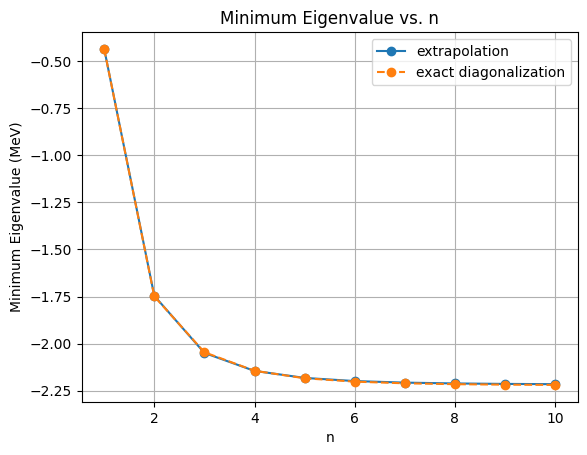

In [193]:
# 定义常数
hbar_times_omega = 7.0  # hbar * omega = 7 MeV
V0 = -5.68658111  # 势能常数 V0 = -5.68658111 MeV
Lambda = 152.0  # 超紫外截断 Λ ≈ 152 MeV
N_max = 10  # 最大基础维度（可以根据需要更改）
n_values = np.arange(1, N_max + 1)

# 存储最小 eigenvalue
min_eigenvalues = []

for N in n_values:
    # 构建哈密顿量矩阵
    H = np.zeros((N, N), dtype=complex)

    for n in range(N):
        for n_prime in range(N):
            T_element = (hbar_times_omega / 2) * (
                (2 * n + 3/2) * (n_prime == n) -
                np.sqrt(n * (n + 1/2)) * (n_prime + 1 == n ) -
                np.sqrt((n + 1) * (n + 3/2)) * (n_prime-1 == n )
            )
            V_element = V0 * (n == 0) * (n_prime == n)
            H[n, n_prime] = T_element + V_element

    # 对角化哈密顿量矩阵
    eigenvalues, eigenvectors = eigh(H)
    
    # 获取最小 eigenvalue 并添加到列表
    min_eigenvalues.append(min(eigenvalues))
    

# 转换为 NumPy 数组
min_eigenvalues = np.array(min_eigenvalues)
print(min_eigenvalues)
# 绘制E_N关于N的图像
N_values = np.arange(1, 11)
plt.plot(N_values, E_N_values, marker='o',label='extrapolation')
plt.xlabel('N')
plt.ylabel('Energy (E_N)')
plt.title('Energy Function E_N vs. N')

# 绘制最小 eigenvalue 与 n 的关系图像
plt.plot(n_values, min_eigenvalues, 'x--',marker='o',label='exact diagonalization')
plt.xlabel('n')
plt.ylabel('Minimum Eigenvalue (MeV)')
plt.title('Minimum Eigenvalue vs. n')
plt.grid(True)
plt.legend()
plt.show()

Pauli

In [57]:
import numpy as np

# 定义 Pauli-Z 矩阵 (σ_z)
sigma_z = np.array([[1, 0],
                    [0, -1]])

# 定义单位矩阵 (I)
identity = np.identity(2)

# 定义哈密顿量 H1
hbar = 1  # 由于 MeV 和哈密顿量单位匹配，可以将 hbar 设置为 1
omega = 7 / hbar
m = 1879.45
k = -26743129849360.53
gamma = 13834391.498240285
Z0 = sigma_z  # Pauli-Z 矩阵
I = identity  # 单位矩阵
H1 = 0.218291 * (Z0 - I)

# 计算哈密顿量 H1 的本征值
eigenvalues = np.linalg.eigvals(H1)

# 打印本征值
print("H1 的本征值：", eigenvalues)


H1 的本征值： [ 0.       -0.436582]


In [61]:
import sympy as sp

# 定义符号
N = sp.symbols('N', integer=True)
omega, V0, hbar = sp.symbols('omega V0 hbar', real=True, positive=True)
X, Y, Z = sp.symbols('X Y Z')

# 定义费米子产生和湮灭算符
def a_dagger(n):
    return (1/2) * sp.prod([-Z.subs(m, j) for j in range(n)]) * (X - sp.I*Y)

def a(n):
    return (1/2) * sp.prod([-Z.subs(m, j) for j in range(n)]) * (X + sp.I*Y)

# 定义T和V的矩阵元素
def T_matrix_element(n, n_prime):
    return (hbar*omega/2) * ((2*n + 3/2)*sp.KroneckerDelta(n_prime, n) - sp.sqrt(n*(n+1/2))*sp.KroneckerDelta(n_prime, n+1) - sp.sqrt(n*(n+3/2))*sp.KroneckerDelta(n_prime, n-1))

def V_matrix_element(n, n_prime):
    return V0 * sp.KroneckerDelta(n, 0) * sp.KroneckerDelta(n_prime, n)

# 构建原始哈密顿量
H_N = sp.Sum(T_matrix_element(n, n_prime) * a_dagger(n_prime) * a(n), (n, 0, N-1), (n_prime, 0, N-1)) + sp.Sum(V_matrix_element(n, n_prime) * a_dagger(n_prime) * a(n), (n, 0, N-1), (n_prime, 0, N-1))

# 打印原始哈密顿量
print("原始哈密顿量:")
sp.pretty_print(H_N)

# 进行Jordan-Wigner变换
H_N_JW = H_N.subs({a_dagger(n): (1/2) * sp.prod([-Z.subs(m, j) for j in range(n)]) * sp.Symbol('sigma_n_plus') for n in range(N)}
                 ).subs({a(n): (1/2) * sp.prod([-Z.subs(m, j) for j in range(n)]) * sp.Symbol('sigma_n_minus') for n in range(N)})

# 打印Jordan-Wigner变换后的哈密顿量
print("\nJordan-Wigner变换后的哈密顿量:")
sp.pretty_print(H_N_JW)



TypeError: 'Symbol' object cannot be interpreted as an integer